In [1]:
%load_ext watermark

In [2]:
%watermark -a Schmelling,Nicolas -u -d -v -p matplotlib,numpy,pandas

Schmelling,Nicolas 
Last updated: 06/10/2015 

CPython 2.7.9
IPython 3.0.0

matplotlib 1.4.3
numpy 1.9.2
pandas 0.15.2


---
Any comments and suggestions or questions?     
Please feel free to contact me via [twitter](https://twitter.com/bio_mediocre) or [email](mailto:schmelli@msu.edu).

---

#Impact of filtering on the number of hits#
---

In the previous [IPython notebook](1_KaiABC_BLAST_DataCollectionProcessing.ipynb) we collected all sorts of data about BLAST results and metrics, and additional information about the organism and protein itself. In the following the number of hits for each step will be recorded and vizualized to determine the effctiveness of filter steps.

---


<a id='Content'></a>
-----

#Content#
---

| [Counting of hits](#code) | [Visualization of hit count](#barplot) |

---

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<a id='code'></a>
-----

###Counting of hits###
---

In [4]:
genes_pcc7942 = ['kaiA','kaiB','kaiC','pex','ldpA','nhtA','prkE','ircA','cdpA','cikA','sasA',
                 'labA','lalA','crm','rpaA','rpaB','cpmA','crr37','prx','rpl21','rpl27']

In [5]:
genes_pcc6803 = ['kaiA','kaiB1','kaiC1','kaiB2','kaiC2','kaiB3','kaiC3',
                 'cikA','sasA','rpaA','rpaB','cpmA','narL','pilT']

In [6]:
hits_pcc7942 = []
hits_back_pcc7942 = []
hits_filter_pcc7942 = []

for i in genes_pcc7942:
    df = pd.read_csv('1._BLAST/Synechococcus/%s_BLAST.csv'%i)
    hits_pcc7942.append(len(df))
    df = pd.read_csv('1._BLAST/Synechococcus/%s_hits.csv'%i)
    hits_back_pcc7942.append(len(df))
    df = pd.read_csv('1._BLAST/Synechococcus/%s_all.csv'%i)
    hits_filter_pcc7942.append(len(df))

print hits_pcc7942
print hits_back_pcc7942
print hits_filter_pcc7942

[371, 1470, 5149, 259, 739, 27984, 30976, 9492, 623, 16075, 19600, 4511, 4694, 1301, 34698, 43170, 3211, 39513, 37118, 30422, 32749]
[347, 1413, 5028, 251, 739, 7920, 30898, 9480, 461, 3040, 3380, 591, 4212, 1300, 1303, 20549, 3103, 437, 33545, 29450, 31628]
[131, 511, 1713, 89, 324, 3203, 13269, 5999, 169, 1200, 1594, 199, 1820, 578, 683, 11958, 1315, 214, 16817, 14255, 15511]


In [7]:
hits_pcc6803 = []
hits_back_pcc6803 = []
hits_filter_pcc6803 = []

for i in genes_pcc6803:
    df = pd.read_csv('1._BLAST/Synechocystis/%s_BLAST.csv'%i)
    hits_pcc6803.append(len(df))
    df = pd.read_csv('1._BLAST/Synechocystis/%s_hits.csv'%i)
    hits_back_pcc6803.append(len(df))
    df = pd.read_csv('1._BLAST/Synechocystis/%s_all.csv'%i)
    hits_filter_pcc6803.append(len(df))

print hits_pcc6803
print hits_back_pcc6803
print hits_filter_pcc6803

[369, 1471, 5131, 1431, 7508, 1437, 5100, 19335, 28792, 42955, 45332, 3998, 681, 31887]
[347, 761, 1781, 432, 820, 225, 2565, 615, 2350, 3117, 25439, 3927, 123, 20442]
[131, 291, 639, 134, 258, 89, 882, 216, 822, 1724, 13680, 1534, 50, 7192]


In [8]:
print sum(hits_pcc7942)+sum(hits_pcc6803)
print sum(hits_back_pcc7942)+sum(hits_back_pcc6803)
print sum(hits_filter_pcc7942)+sum(hits_filter_pcc6803)

539552
252019
119194


[Back to Content](#Content)

<a id='barplot'></a>
-----

---
###Visualization of hit count###
---

In [9]:
def plot_barh(hits, hits_back, filters, genes, name):

    f, ax = plt.subplots(1,1, figsize=(3.75,8.5)) 
    
    hfont = {'fontname':'Arial'}
    
    # Remove the plot frame lines. They are unnecessary chartjunk.   
    ax.spines["top"].set_visible(False)  
    ax.spines["bottom"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.spines["left"].set_visible(False)  

    # Ensure that the axis ticks only show up on the bottom and left of the plot.  
    # Ticks on the right and top of the plot are generally unnecessary chartjunk.  
    ax.get_xaxis().tick_top()  
    ax.get_yaxis().tick_left()  

    # Add gridlines for x-axis
    ax.xaxis.grid(True, lw=2, linestyle='-', alpha=1, color='w')

    # Limit the range of the plot to only where the data is.  
    # Avoid unnecessary whitespace.  
    xlim(-100, 50500) 

    # Make sure your axis ticks are large enough to be easily read.  
    # You don't want your viewers squinting to read your plot.  
    width = 0.3
    xticks(range(0, 45001, 10000), [str(x)+'k' for x in range(0, 45, 10)], fontsize=12, rotation=0, **hfont)  
    yticks(np.arange(len(hits))+width/2, genes, fontsize=12, **hfont)

    # Put xlabel to top of graph
    ax.xaxis.set_label_position('top') 

    # Remove the tick marks; they are unnecessary with the tick lines we just plotted.  
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
                    labelbottom="off", left="off", right="off", labelleft="on")
    
    # Let's do the actual ploting
    nr_blastp = ax.barh(np.arange(len(hits))-width, hits, width, align='center', color='darkgreen',
                       alpha=0.2, lw=0, label='nr')

    back_blastp = ax.barh(np.arange(len(hits_back)), hits_back, width, align='center', color='darkgreen',
                       alpha=0.7, lw=0, label='Genome')
    
    filter_blastp = ax.barh(np.arange(len(hits_back))+width, filters, width, align='center', color='darkgreen',
                       alpha=1, lw=0, label='Filter')

    # Add labels and legend
    plt.xlabel('No. of blast hits', fontsize=14, **hfont)
    plt.legend(loc='best', fontsize=11).draw_frame(False)


    # Add bar labels so the viewer can directly see the actual value.
    def col_label(col):
        # Attach the value to the bars
        for val in col:
            width = int(val.get_width())
            
            # Check if the value is smaller than 50000, if so show the value right of the bar in black color
            if (width < 50000):
                xloc = width + 500
                clr = 'black'
                align = 'left'
                
            # Is the value is larger than 50000, show the value inside the bar in white color
            else:
                xloc = width - 1000
                clr = 'white'
                align = 'right'
                
            ax.text(xloc, val.get_y() + val.get_height()/2., '%d'%width,
                    horizontalalignment=align, verticalalignment='center', color=clr, weight='bold',
                    fontsize=9, **hfont)

    col_label(nr_blastp)
    col_label(back_blastp)
    col_label(filter_blastp)

    f.tight_layout()
    ax.invert_yaxis()

    #plt.savefig(name, format='png',dpi=600)
    plt.show()

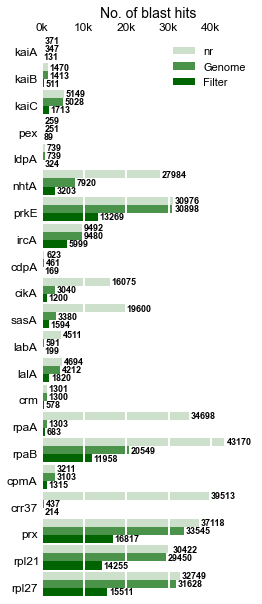

In [10]:
name = 'nr_blastp_hits_synechococcus.png'

plot_barh(hits_pcc7942, hits_back_pcc7942, hits_filter_pcc7942, genes_pcc7942, name)

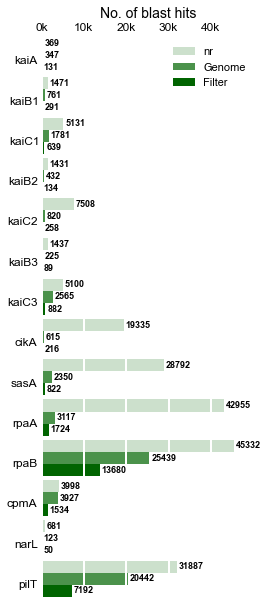

In [11]:
name = 'nr_blastp_hits_synechocystis.png'

plot_barh(hits_pcc6803, hits_back_pcc6803, hits_filter_pcc6803, genes_pcc6803, name)

---
###Previous###

+ [Data Collection and Processing](1_KaiABC_BLAST_DataCollectionProcessing.ipynb)

###Next###

+ [Distribution of circadian clock protein](3_KaiABC_BLAST_Heatmap.ipynb)
+ [Length distribution of KaiA, KaiB, KaiC](4_KaiABC_BLAST_Scatterplot.ipynb)
+ [Co-occurence of circadian clock proteins in cyanobacteria](5_KaiABC_BLAST_FisherTest.ipynb)

---